In [169]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [170]:
heart_failure = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [171]:
def standard_units(array):
    "Convert any array of numbers to standard units."
    return (array - np.mean(array))/np.std(array) 

standard_units([0, 0, 0, 0, 1, 0, 0])

array([-0.40824829, -0.40824829, -0.40824829, -0.40824829,  2.44948974,
       -0.40824829, -0.40824829])

In [172]:
column_one = heart_failure['age']
standard_units(column_one)

0      1.192945
1     -0.491279
2      0.350833
3     -0.912335
4      0.350833
         ...   
294    0.098199
295   -0.491279
296   -1.333392
297   -1.333392
298   -0.912335
Name: age, Length: 299, dtype: float64

In [173]:
heart_failure_su = pd.DataFrame()

for col in heart_failure.columns:
    if col == 'DEATH_EVENT':
        heart_failure_su[col] = heart_failure[col]
    else:
        column = heart_failure[col]
        column_su = standard_units(column)
        heart_failure_su[col] = column_su
        
  
print(heart_failure_su['DEATH_EVENT'])
print(heart_failure_su['age'])

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64
0      1.192945
1     -0.491279
2      0.350833
3     -0.912335
4      0.350833
         ...   
294    0.098199
295   -0.491279
296   -1.333392
297   -1.333392
298   -0.912335
Name: age, Length: 299, dtype: float64


In [174]:
#randomize rows
heart_failure_su = heart_failure_su.sample(frac=1).reset_index(drop=True)
heart_failure_su

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,-1.501814,1.147968,-0.231081,-0.847579,1.008578,-0.735688,-2.699496e-01,-0.090900,-0.368986,-1.359272,-0.687682,-0.429259,0
1,1.024523,-0.871105,0.000166,-0.847579,-0.260991,1.359272,-6.181656e-01,-0.090900,-0.595996,0.735688,-0.687682,0.835513,0
2,-0.238646,1.147968,-0.463359,-0.847579,1.854958,1.359272,-4.542993e-01,-0.381379,0.993074,0.735688,-0.687682,-0.609941,0
3,-0.912335,1.147968,-0.343607,1.179830,-0.260991,1.359272,5.698654e-01,-0.381379,-1.958056,-1.359272,-0.687682,-1.319762,1
4,-0.912335,1.147968,-0.427227,-0.847579,-0.007077,1.359272,1.294746e-01,-0.284552,0.085034,0.735688,-0.687682,-1.539162,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,-0.070223,1.147968,-0.441680,-0.847579,-1.107370,-0.735688,-5.464741e-01,0.296405,-0.368986,0.735688,-0.687682,-0.622847,1
295,-0.491279,1.147968,-0.425162,1.179830,0.162199,-0.735688,7.439734e-01,-0.187726,-0.368986,0.735688,-0.687682,1.545334,0
296,0.771889,-0.871105,0.261350,-0.847579,-0.260991,1.359272,4.264824e-01,-0.575031,-0.823006,-1.359272,-0.687682,0.190221,0
297,1.024523,-0.871105,0.000166,-0.847579,-1.530560,-0.735688,7.535660e-09,0.422279,-0.595996,0.735688,-0.687682,0.874230,1


In [175]:
X = heart_failure_su.loc[:, heart_failure_su.columns != 'DEATH_EVENT']
y = heart_failure_su['DEATH_EVENT']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [177]:

k_range = range(1, 20)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

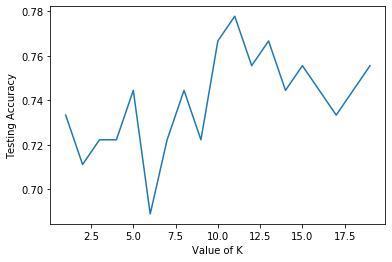

In [178]:
plt.plot(k_range, scores_list)
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy")

It looks like k values around 11 give the highest accuracy. 

In [179]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=7)

In [180]:
#check to see if there are missing values in this table
heart_failure_su.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

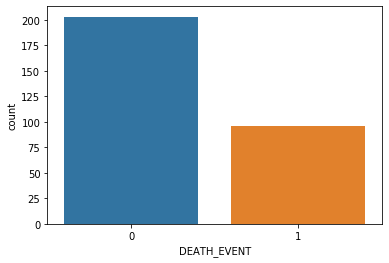

In [181]:
sns.countplot(heart_failure_su['DEATH_EVENT'])

It looks like there are twice as many people who survive in our dataset than people who die. I'm going to double the data of people who die, add it to the dataset, and see if the accuracy rate improves.

In [182]:
deaths = heart_failure_su[(heart_failure_su['DEATH_EVENT']==1)]
frames = [deaths, heart_failure_su]
heart_failure_su = pd.concat(frames)

Text(0, 0.5, 'Testing Accuracy')

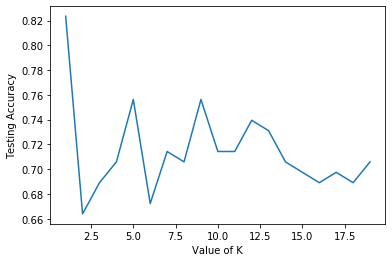

In [183]:
#randomize rows
heart_failure_su = heart_failure_su.sample(frac=1).reset_index(drop=True)

X = heart_failure_su.loc[:, heart_failure_su.columns != 'DEATH_EVENT']
y = heart_failure_su['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


k_range = range(1, 20)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores_list)
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy")

The testing accuracy did not change significantly. This means that while my original dataset was imbalanced, the class imblance did not affect the accuracy of the classifier.